In [2]:
!pip install supervision 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [4]:
from torch.cuda import device

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import supervision as sv
import torch


DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sam = sam_model_registry["vit_h"](checkpoint="/content/sam_vit_h_4b8939.pth").to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)


image_bgr = cv2.imread('/content/frame_saved.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)
masks = mask_generator.generate(image_rgb)
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-2t2rot_7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-2t2rot_7
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=8e20b747bab6877c204d15a2c78cc61c5ce5a233c4441202119392e26dc985de
  Stored in directory: /tmp/pip-ephem-wheel-cache-seulwodb/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


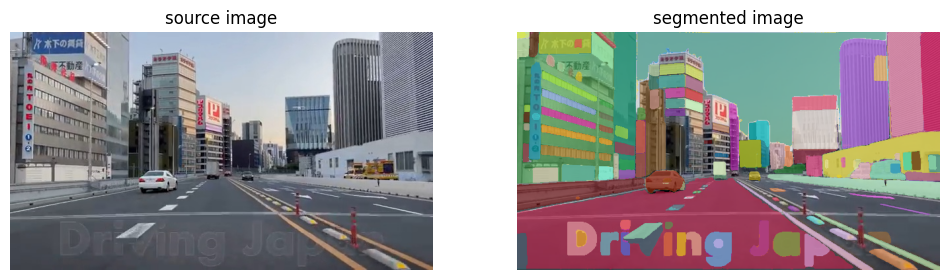

In [5]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)